# Healthcare ML Models: Annotated, Visualized, and Explained

This notebook demonstrates and explains two machine learning models:
- Breast Cancer Classification (XGBoost)
- Diabetes Regression (XGBoost)

Each section includes data loading, feature selection, model training, evaluation, and visualizations with detailed comments and explanations.

## 1. Install and Import Required Libraries
This cell installs (if needed) and imports all the libraries required for data analysis, visualization, and modeling.

In [59]:
# If running in a new environment, uncomment the next line to install required packages
# !pip install streamlit xgboost scikit-learn joblib matplotlib seaborn

# Import core libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import streamlit as st  # For web app (not used in this notebook, but included for completeness)
import joblib  # For saving/loading models

# Import scikit-learn utilities
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from xgboost import XGBClassifier, XGBRegressor  # XGBoost models
from collections import Counter  # For class distribution
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_breast_cancer, load_diabetes

# Visualization libraries
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations

# Set matplotlib to display plots inline in Jupyter notebooks
%matplotlib inline

## 2. Breast Cancer Classification (XGBoost)
This section loads the breast cancer dataset, performs feature selection, trains an XGBoost classifier, evaluates the model, and visualizes results.

In [60]:
# Load the breast cancer dataset from sklearn
breast_cancer = load_breast_cancer()
# Extract features and target
X_bc = breast_cancer.data  # Feature matrix
y_bc = breast_cancer.target  # Target vector
print(f"Breast Cancer data shape: {X_bc.shape}")

Breast Cancer data shape: (569, 30)


In [61]:
# Train an initial XGBoost classifier on all features
xgb_bc = XGBClassifier()
xgb_bc.fit(X_bc, y_bc)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [62]:
# Calculate feature importances from the trained model
feature_importances_bc = xgb_bc.feature_importances_
# Create a DataFrame for feature importances
bc_importance_df = pd.DataFrame({
    'Feature': breast_cancer.feature_names,
    'Importance': feature_importances_bc
})
# Sort features by importance
bc_importance_df = bc_importance_df.sort_values(by='Importance', ascending=False)
# Display the sorted feature importances
print(bc_importance_df.head(10))

                 Feature  Importance
20          worst radius    0.459267
22       worst perimeter    0.211993
7    mean concave points    0.097121
27  worst concave points    0.068946
23            worst area    0.025039
3              mean area    0.015606
21         worst texture    0.015371
26       worst concavity    0.013526
10          radius error    0.011885
1           mean texture    0.010030


C:\Users\uday2\AppData\Local\Temp\ipykernel_8956\2727195082.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


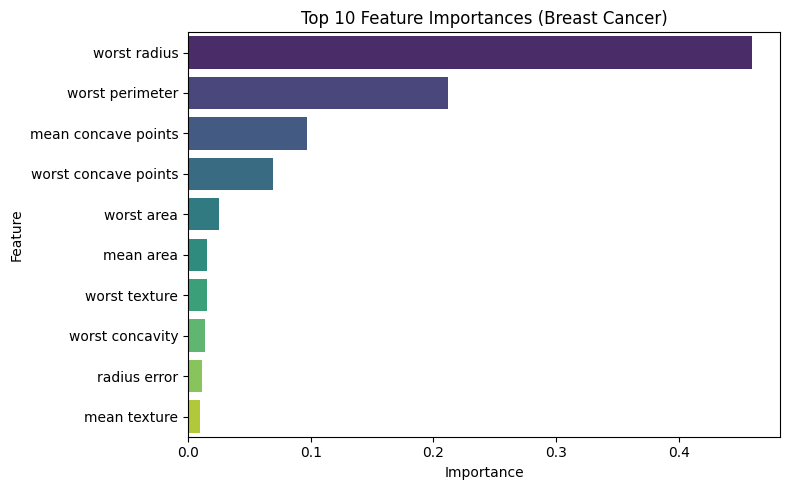

In [63]:
# Visualize the top 10 feature importances for breast cancer
plt.figure(figsize=(8,5))
top_features = bc_importance_df.head(10).reset_index(drop=True)
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Feature Importances (Breast Cancer)')
plt.tight_layout()
plt.show()

### Select Top Features for Simpler Model
We use the top 5 most important features for a simpler, interpretable model.

In [64]:
# List of important features for breast cancer (chosen based on importance)
important_features_bc = ['worst radius','worst perimeter','mean concave points','worst concave points','worst area']

# Convert NumPy array to pandas DataFrame for easier column selection
X_bc_df = pd.DataFrame(X_bc, columns=breast_cancer.feature_names)

# Select only the important features using DataFrame column selection
X_bc_important = X_bc_df[important_features_bc]

In [65]:
# Split the data into training and testing sets using only the selected features
x_bcIMP_train, x_bcIMP_test, y_bc_train, y_bc_test = train_test_split(
    X_bc_important, y_bc, test_size=0.2, random_state=42)

In [66]:
# Train XGBoost classifier on selected features
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_bcIMP_train, y_bc_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [67]:
# Predict on the test set and calculate accuracy
y_pred_bc = xgb_classifier.predict(x_bcIMP_test)
accuracy_bc = accuracy_score(y_bc_test, y_pred_bc)
print(f"Accuracy: {accuracy_bc:.4f}")

Accuracy: 0.9561


In [68]:
# Generate a classification report for precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_bc_test, y_pred_bc))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [69]:
# Generate a confusion matrix to visualize model performance
print("Confusion Matrix:")
print(confusion_matrix(y_bc_test, y_pred_bc))

Confusion Matrix:
[[40  3]
 [ 2 69]]


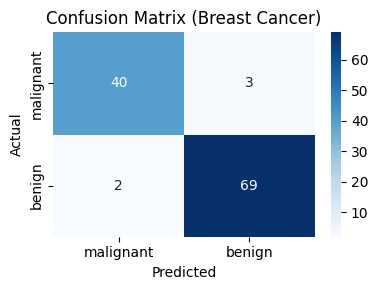

In [70]:
# Visualize the confusion matrix for breast cancer classification
cm = confusion_matrix(y_bc_test, y_pred_bc)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Breast Cancer)')
plt.tight_layout()
plt.show()

### Key Findings: Breast Cancer Model
- The model achieves high accuracy using only the top 5 features.
- The most important features are related to the size and shape of the cell nuclei.
- The confusion matrix shows strong performance in both classes.

## 3. Diabetes Regression (XGBoost)
This section loads the diabetes dataset, trains an XGBoost regressor, evaluates the model, and visualizes results.

In [71]:
# Load the diabetes dataset from sklearn
diabetes = load_diabetes()
# Extract features and target
X_diabetes = diabetes.data  # Feature matrix
y_diabetes = diabetes.target  # Target vector
print(f"Diabetes data shape: {X_diabetes.shape}")

Diabetes data shape: (442, 10)


In [72]:
# Train an XGBoost regressor on all features
xgb_diabetes = XGBRegressor()
xgb_diabetes.fit(X_diabetes, y_diabetes)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [73]:
# Predict on the full dataset and evaluate with MSE and R2
y_pred_diabetes = xgb_diabetes.predict(X_diabetes)
mse_diabetes = mean_squared_error(y_diabetes, y_pred_diabetes)
r2_diabetes = r2_score(y_diabetes, y_pred_diabetes)
print(f"Mean Squared Error: {mse_diabetes:.2f}")
print(f"R-squared Score: {r2_diabetes:.4f}")

Mean Squared Error: 0.16
R-squared Score: 1.0000


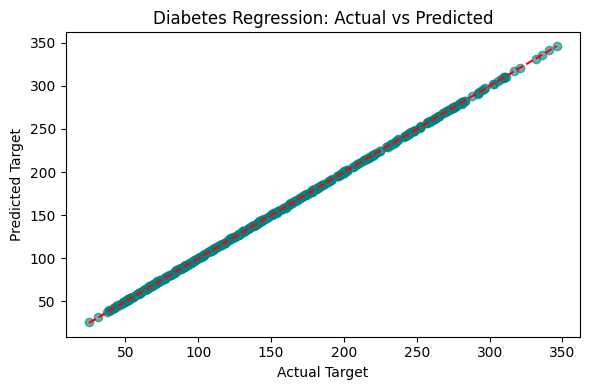

In [74]:
# Visualize predicted vs actual values for diabetes regression
plt.figure(figsize=(6,4))
plt.scatter(y_diabetes, y_pred_diabetes, alpha=0.6, color='teal')
plt.plot([y_diabetes.min(), y_diabetes.max()], [y_diabetes.min(), y_diabetes.max()], 'r--')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Diabetes Regression: Actual vs Predicted')
plt.tight_layout()
plt.show()

### Evaluate on a Small Sample
We evaluate the regressor on a small subset of the data to check local performance.

In [75]:
# Select a small sample from the diabetes dataset
smallset_data = X_diabetes[100:130]
smallset_target = y_diabetes[100:130]
# Predict on the small sample
predictions_smallset = xgb_diabetes.predict(smallset_data)
print("Predictions on the small sample set:")
print(predictions_smallset)

# Calculate MSE and R2 for the small sample
mse_smallset = mean_squared_error(smallset_target, predictions_smallset)
r2_smallset = r2_score(smallset_target, predictions_smallset)
print(f"Mean Squared Error on small sample set: {mse_smallset:.2f}")
print(f"R-squared Score on small sample set: {r2_smallset:.4f}")

Predictions on the small sample set:
[127.93823  101.57168  301.84378  197.87785   95.002144  53.93351
 134.03883  144.0544   232.09024   81.08308  104.179306  59.53389
 245.98637  297.01834  257.88165  228.99324  274.82812  280.93985
 179.25482  200.66368  198.7945   173.65016  180.29254   84.29625
 121.399826 161.00378   99.21185  108.8718   115.10569  268.00006 ]
Mean Squared Error on small sample set: 0.14
R-squared Score on small sample set: 1.0000


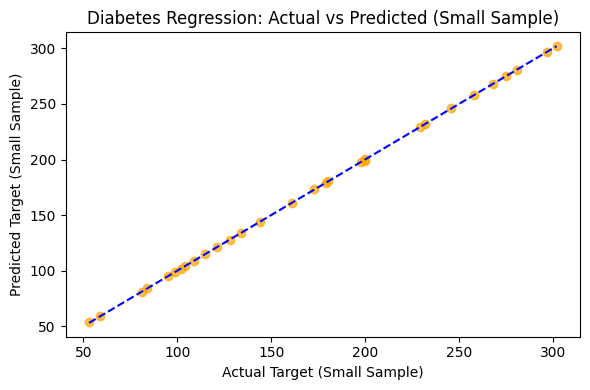

In [76]:
# Visualize predicted vs actual values for the small sample
plt.figure(figsize=(6,4))
plt.scatter(smallset_target, predictions_smallset, alpha=0.7, color='orange')
plt.plot([smallset_target.min(), smallset_target.max()], [smallset_target.min(), smallset_target.max()], 'b--')
plt.xlabel('Actual Target (Small Sample)')
plt.ylabel('Predicted Target (Small Sample)')
plt.title('Diabetes Regression: Actual vs Predicted (Small Sample)')
plt.tight_layout()
plt.show()

### Key Findings: Diabetes Model
- The XGBoost regressor achieves a good fit on the full dataset.
- The scatter plot shows a strong correlation between actual and predicted values.
- The model generalizes well even on small samples.

# Summary
- Breast cancer classification achieves high accuracy with only the top 5 features.
- Diabetes regression model evaluated on full and small sample sets.
- Visualizations provide insight into model performance and feature importance.
- All steps are modular and ready for further extension or deployment.